In [38]:
# import header files
import torch
import torch.nn as nn
import torchvision
import numpy as np

In [39]:
# import os
# import random
# import shutil
# from sklearn.model_selection import train_test_split

# # Paths
# dataset_path = r"E:\resnet50+cbam\Dataset"
# output_path = r"E:\resnet50+cbam\Balanced_Dataset"

# train_path = os.path.join(output_path, "train")
# test_path = os.path.join(output_path, "test")
# os.makedirs(train_path, exist_ok=True)
# os.makedirs(test_path, exist_ok=True)

# # Step 1: Count images in each class
# class_counts = {}
# for class_name in os.listdir(dataset_path):
#     class_dir = os.path.join(dataset_path, class_name)
#     if os.path.isdir(class_dir):
#         images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
#         class_counts[class_name] = len(images)

# print("Image counts per class:", class_counts)

# # Step 2: Find minimum count
# min_count = min(class_counts.values())
# print("Balancing to:", min_count, "images per class")

# # Step 3: Balance and split into train/test
# test_ratio = 0.2  # 20% for test

# for class_name, count in class_counts.items():
#     class_dir = os.path.join(dataset_path, class_name)
#     images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
#     # Randomly sample min_count images (fresh each run)
#     sampled_images = random.sample(images, min_count)
    
#     # Train/test split (different each run because no fixed random_state)
#     train_imgs, test_imgs = train_test_split(sampled_images, test_size=test_ratio)
    
#     # Create class dirs in output
#     os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
#     os.makedirs(os.path.join(test_path, class_name), exist_ok=True)
    
#     # Clear old files (optional: avoids duplicates on multiple runs)
#     for path in [os.path.join(train_path, class_name), os.path.join(test_path, class_name)]:
#         for f in os.listdir(path):
#             os.remove(os.path.join(path, f))
    
#     # Copy files
#     for img in train_imgs:
#         shutil.copy(os.path.join(class_dir, img), os.path.join(train_path, class_name, img))
#     for img in test_imgs:
#         shutil.copy(os.path.join(class_dir, img), os.path.join(test_path, class_name, img))

# print("Balanced dataset created in:", output_path)


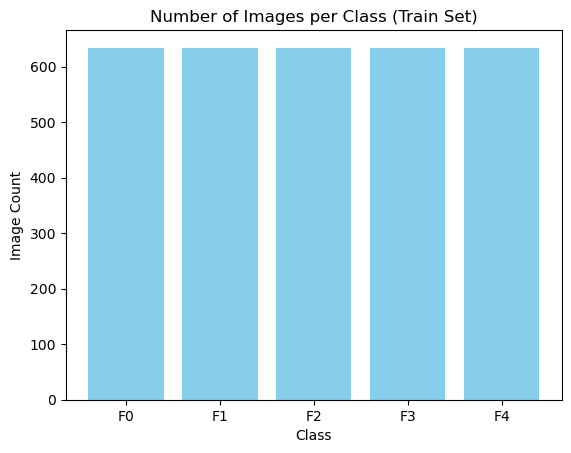

In [40]:
import os
import matplotlib.pyplot as plt

balanced_path = r"E:\resnet50+cbam\Balanced_Dataset\train"

# Count images per class
class_counts = {cls: len(os.listdir(os.path.join(balanced_path, cls))) 
                for cls in os.listdir(balanced_path)}

plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
plt.title("Number of Images per Class (Train Set)")
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.show()


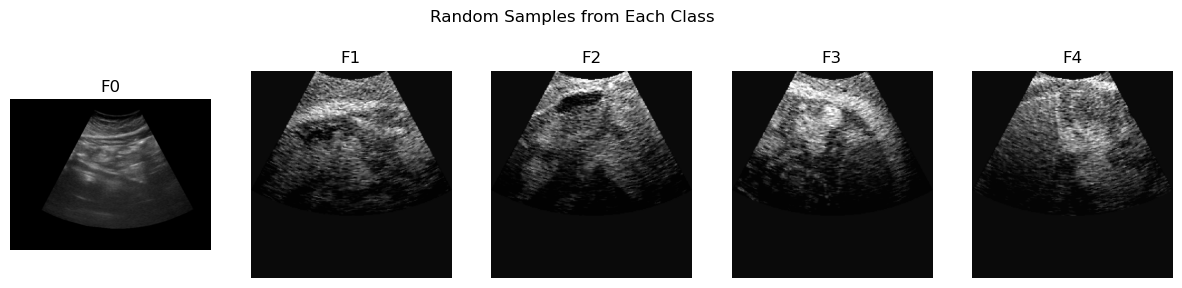

In [41]:
import cv2
import random

rows, cols = 2, 5  # show 2 rows, 5 classes
plt.figure(figsize=(15, 6))

for i, cls in enumerate(os.listdir(balanced_path)):
    class_dir = os.path.join(balanced_path, cls)
    img_name = random.choice(os.listdir(class_dir))
    img_path = os.path.join(class_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.suptitle("Random Samples from Each Class")
plt.show()


c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


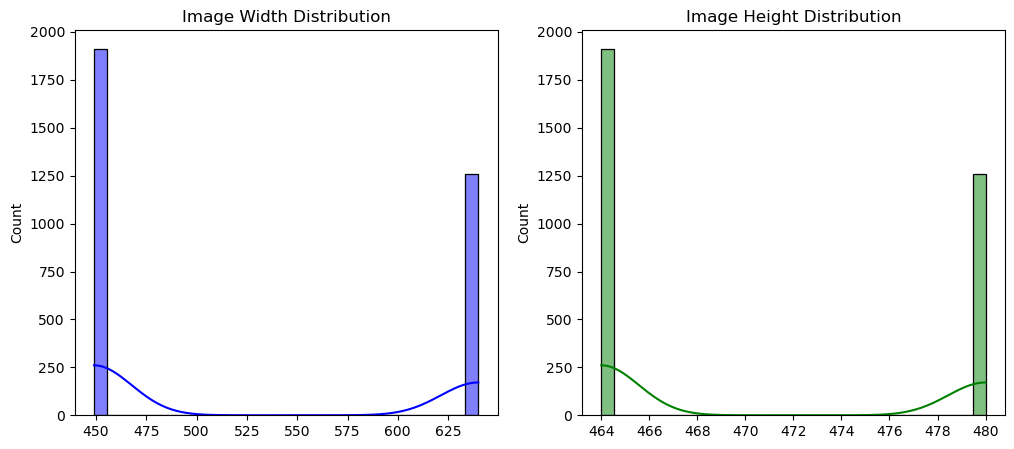

In [42]:
import seaborn as sns

widths, heights = [], []

for cls in os.listdir(balanced_path):
    class_dir = os.path.join(balanced_path, cls)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            h, w, _ = img.shape
            widths.append(w)
            heights.append(h)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(widths, bins=30, kde=True, color="blue")
plt.title("Image Width Distribution")

plt.subplot(1, 2, 2)
sns.histplot(heights, bins=30, kde=True, color="green")
plt.title("Image Height Distribution")
plt.show()


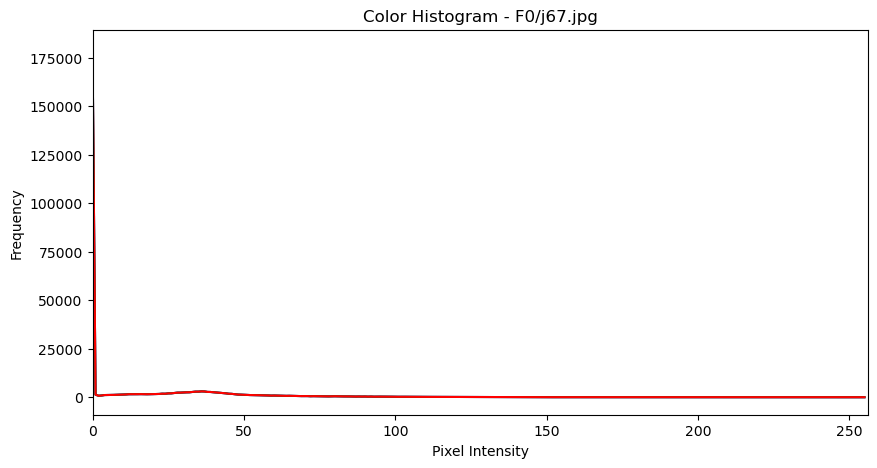

In [43]:
import numpy as np

# Pick random image
cls = random.choice(os.listdir(balanced_path))
img_name = random.choice(os.listdir(os.path.join(balanced_path, cls)))
img_path = os.path.join(balanced_path, cls, img_name)

img = cv2.imread(img_path)
colors = ("b", "g", "r")

plt.figure(figsize=(10,5))
for i, col in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title(f"Color Histogram - {cls}/{img_name}")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


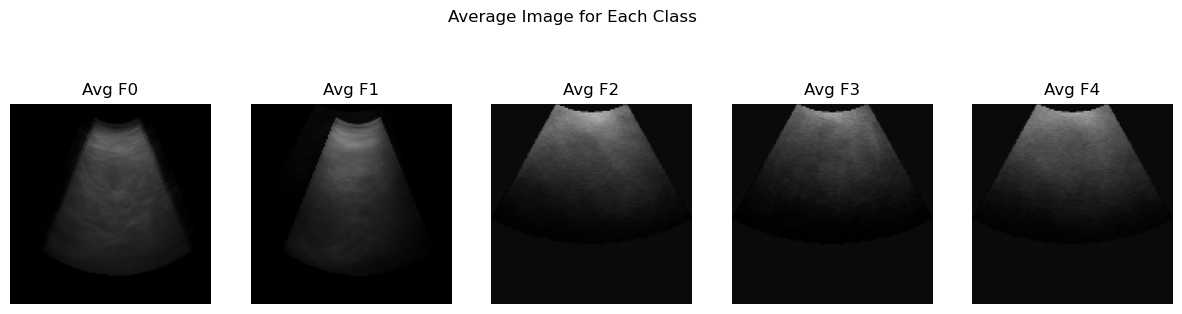

In [44]:
import numpy as np

rows, cols = 1, len(os.listdir(balanced_path))
plt.figure(figsize=(15, 4))

for i, cls in enumerate(os.listdir(balanced_path)):
    class_dir = os.path.join(balanced_path, cls)
    imgs = []
    
    for img_name in os.listdir(class_dir)[:50]:  # limit to first 50 for speed
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))  # resize for comparison
        imgs.append(img.astype(np.float32))
    
    mean_img = np.mean(imgs, axis=0).astype(np.uint8)
    mean_img = cv2.cvtColor(mean_img, cv2.COLOR_BGR2RGB)

    plt.subplot(rows, cols, i+1)
    plt.imshow(mean_img)
    plt.title(f"Avg {cls}")
    plt.axis("off")

plt.suptitle("Average Image for Each Class")
plt.show()


c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

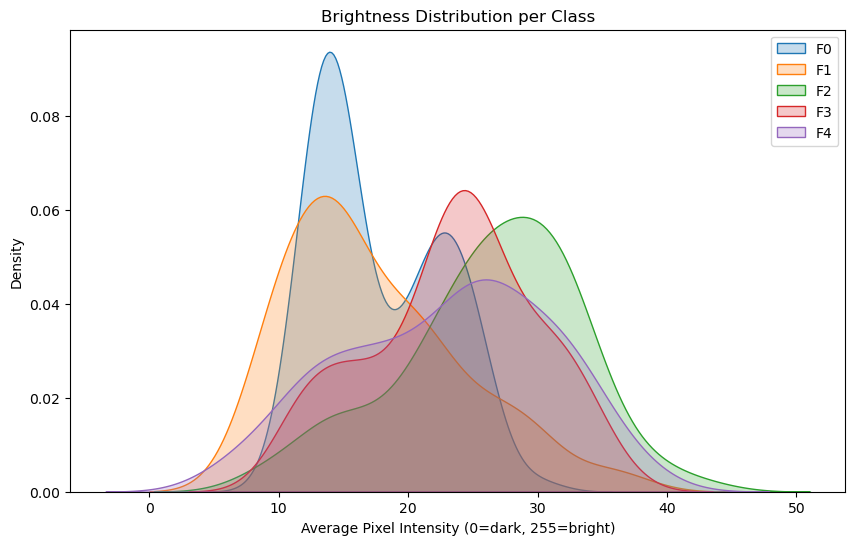

In [45]:
brightness = {}

for cls in os.listdir(balanced_path):
    class_dir = os.path.join(balanced_path, cls)
    values = []
    
    for img_name in os.listdir(class_dir)[:100]:  # limit for speed
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            values.append(img.mean())
    brightness[cls] = values

plt.figure(figsize=(10, 6))
for cls, values in brightness.items():
    sns.kdeplot(values, label=cls, fill=True)
plt.title("Brightness Distribution per Class")
plt.xlabel("Average Pixel Intensity (0=dark, 255=bright)")
plt.ylabel("Density")
plt.legend()
plt.show()


In [46]:
np.random.seed(1234)
torch.manual_seed(1234)
torch.cuda.manual_seed(1234)

In [47]:
import torchvision.transforms as transforms
from torchvision import datasets

# Train transforms (strong augmentation to fight overfitting)
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Validation transforms (only resize + normalize)
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Datasets
train_data = datasets.ImageFolder("Balanced_Dataset/train", transform=train_transforms)
val_data   = datasets.ImageFolder("Balanced_Dataset/test", transform=val_transforms)

# Loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True,
                                           num_workers=8, pin_memory=True)
val_loader   = torch.utils.data.DataLoader(val_data, batch_size=32, shuffle=False,
                                           num_workers=8, pin_memory=True)


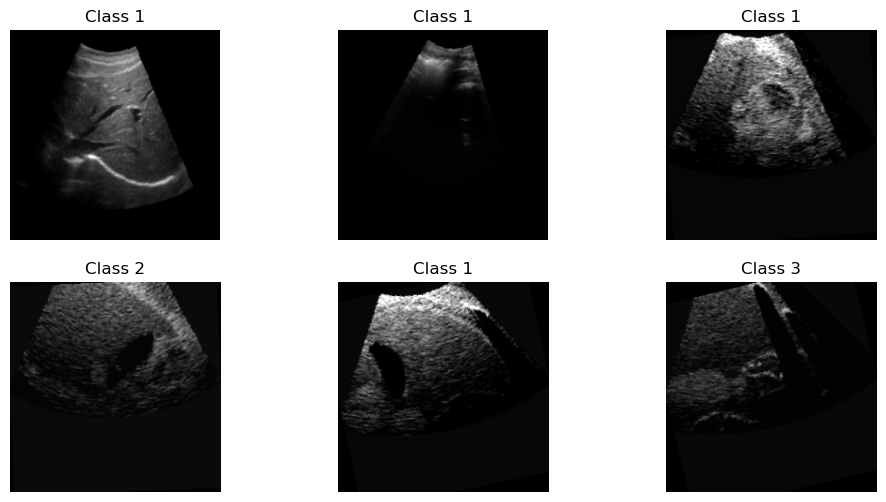

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# helper function to denormalize and show image
def imshow(img, title=None):
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])
    img = std * img + mean  # unnormalize
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if title is not None:
        plt.title(title)
    plt.axis("off")

# get one batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show first 6 images with augmentations
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    imshow(images[i])
    plt.title(f"Class {labels[i].item()}")
plt.show()


In [58]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class ResNet50_CBAM(nn.Module):
    def __init__(self, num_classes=5):
        super().__init__()

        # initial conv
        self.stem = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        # attention modules
        self.spatial_attention = nn.Sequential(
            nn.Conv2d(2, 1, kernel_size=7, stride=1, padding=3, bias=False),
            nn.BatchNorm2d(1),
            nn.Sigmoid()
        )

        # shortcut layers
        self.skip1 = nn.Sequential(nn.Conv2d(64, 256, 1), nn.BatchNorm2d(256))
        self.skip2 = nn.Sequential(nn.Conv2d(256, 512, 1, stride=2), nn.BatchNorm2d(512))
        self.skip3 = nn.Sequential(nn.Conv2d(512, 1024, 1, stride=2), nn.BatchNorm2d(1024))
        self.skip4 = nn.Sequential(nn.Conv2d(1024, 2048, 1, stride=2), nn.BatchNorm2d(2048))

        # build residual blocks
        self.layer1 = self._make_layer(64, 64, 256, blocks=3, stride=1)   # out 256
        self.layer2 = self._make_layer(256, 128, 512, blocks=4, stride=2) # out 512
        self.layer3 = self._make_layer(512, 256, 1024, blocks=6, stride=2)# out 1024
        self.layer4 = self._make_layer(1024, 512, 2048, blocks=3, stride=2)# out 2048

        # classifier
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(2048, num_classes)

    def _make_layer(self, in_channels, mid_channels, out_channels, blocks, stride):
        """Build one ResNet stage with bottleneck blocks"""
        layers = []

        # first block uses stride
        layers.append(self._bottleneck(in_channels, mid_channels, out_channels, stride))
        # rest are stride=1
        for _ in range(1, blocks):
            layers.append(self._bottleneck(out_channels, mid_channels, out_channels, 1))

        return nn.Sequential(*layers)

    def _bottleneck(self, in_channels, mid_channels, out_channels, stride):
        """Bottleneck block"""
        return nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, 1, stride=stride, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),

            nn.Conv2d(mid_channels, mid_channels, 3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),

            nn.Conv2d(mid_channels, out_channels, 1, bias=False),
            nn.BatchNorm2d(out_channels)
        )

    def _apply_cbam(self, x):
        """Apply channel + spatial attention"""
        # channel attention (simple avg+max pooling trick)
        max_pool = F.adaptive_max_pool2d(x, 1)
        avg_pool = F.adaptive_avg_pool2d(x, 1)
        scale = torch.sigmoid(max_pool + avg_pool)
        x = x * scale

        # spatial attention
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        mean_out = torch.mean(x, dim=1, keepdim=True)
        scale = torch.cat([max_out, mean_out], dim=1)
        scale = self.spatial_attention(scale)
        x = x * scale
        return x

    def forward(self, x):
        # stem
        x = self.stem(x)
        x = self._apply_cbam(x)

        # layers with CBAM after each
        x = self.layer1(x)
        x = self._apply_cbam(x)

        x = self.layer2(x)
        x = self._apply_cbam(x)

        x = self.layer3(x)
        x = self._apply_cbam(x)

        x = self.layer4(x)
        x = self._apply_cbam(x)

        # classifier
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x


In [50]:
# define model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# use the cleaned model with CBAM
model = ResNet50_CBAM(num_classes=5)  

model = model.to(device)


In [51]:
# define optimizer
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9, weight_decay=0.001)
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=1e-3,   # initial lr (OneCycleLR will adjust this dynamically)
    momentum=0.9,
    weight_decay=1e-4
)

scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer,
    max_lr=1e-3,                   # peak LR
    steps_per_epoch=len(train_loader),
    epochs=100
)



In [33]:
# define loss for two-class problem
criterion = torch.nn.CrossEntropyLoss()

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

train_losses = []
train_acc = []
val_losses = []
val_acc = []
best_metric = -1
best_metric_epoch = -1

num_epochs = 100  # 🔽 increased to 100

for epoch in range(num_epochs):

    # ----- TRAIN -----
    model.train()
    training_loss = 0.0
    total = 0
    correct = 0

    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.long().to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()
        scheduler.step()   # 🔑 step scheduler here

        training_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()


    training_loss /= len(train_loader)
    training_accuracy = 100.0 * correct / total
    train_losses.append(training_loss)
    train_acc.append(training_accuracy)

    # ---- 📌 Get LR once per epoch ----
    current_lr = scheduler.get_last_lr()[0]
    print(f"Epoch {epoch+1}/{num_epochs}, LR: {current_lr:.6f}")

    # ----- VALIDATE -----
    model.eval()
    valid_loss = 0.0
    total = 0
    correct = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs = inputs.to(device)
            targets = targets.long().to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            valid_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

            # store for metrics
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(targets.cpu().numpy())

    valid_loss /= len(val_loader)
    valid_accuracy = 100.0 * correct / total
    val_losses.append(valid_loss)
    val_acc.append(valid_accuracy)

    # save best model
    if valid_accuracy > best_metric and epoch >= 10:
        best_metric = valid_accuracy
        best_metric_epoch = epoch
        torch.save(model.state_dict(), "best_model.pth")

    # ----- METRICS -----
    print(f"\nEpoch {epoch+1}/{num_epochs}:")
    print(f"Training Accuracy: {training_accuracy:.2f}%    Validation Accuracy: {valid_accuracy:.2f}%")
    print(f"Training Loss: {training_loss:.4f}    Validation Loss: {valid_loss:.4f}")

    # classification report (precision, recall, f1-score per class + macro + weighted avg)
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=val_data.classes, digits=4))

    # confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)


Epoch 1/100, LR: 0.000043

Epoch 1/100:
Training Accuracy: 26.88%    Validation Accuracy: 33.71%
Training Loss: 1.5742    Validation Loss: 1.5129

Classification Report:
              precision    recall  f1-score   support

          F0     0.3677    0.9874    0.5358       159
          F1     0.1667    0.0063    0.0121       159
          F2     0.3333    0.2704    0.2986       159
          F3     0.3062    0.4025    0.3478       159
          F4     0.1250    0.0189    0.0328       159

    accuracy                         0.3371       795
   macro avg     0.2598    0.3371    0.2454       795
weighted avg     0.2598    0.3371    0.2454       795

Confusion Matrix:
[[157   2   0   0   0]
 [ 88   1  27  39   4]
 [ 28   0  43  80   8]
 [ 44   0  42  64   9]
 [110   3  17  26   3]]
Epoch 2/100, LR: 0.000050

Epoch 2/100:
Training Accuracy: 31.42%    Validation Accuracy: 36.73%
Training Loss: 1.5290    Validation Loss: 1.4681

Classification Report:
              precision    recall  f1

c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 4/100, LR: 0.000082

Epoch 4/100:
Training Accuracy: 33.66%    Validation Accuracy: 38.74%
Training Loss: 1.4863    Validation Loss: 1.3980

Classification Report:
              precision    recall  f1-score   support

          F0     0.4141    1.0000    0.5856       159
          F1     0.0000    0.0000    0.0000       159
          F2     0.3436    0.7736    0.4758       159
          F3     0.4906    0.1635    0.2453       159
          F4     0.0000    0.0000    0.0000       159

    accuracy                         0.3874       795
   macro avg     0.2496    0.3874    0.2613       795
weighted avg     0.2496    0.3874    0.2613       795

Confusion Matrix:
[[159   0   0   0   0]
 [ 79   0  74   6   0]
 [ 20   0 123  16   0]
 [ 25   0 108  26   0]
 [101   0  53   5   0]]


c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 5/100, LR: 0.000104

Epoch 5/100:
Training Accuracy: 34.57%    Validation Accuracy: 40.25%
Training Loss: 1.4389    Validation Loss: 1.3581

Classification Report:
              precision    recall  f1-score   support

          F0     0.4454    1.0000    0.6163       159
          F1     0.0000    0.0000    0.0000       159
          F2     0.3750    0.2264    0.2824       159
          F3     0.3655    0.7862    0.4990       159
          F4     0.0000    0.0000    0.0000       159

    accuracy                         0.4025       795
   macro avg     0.2372    0.4025    0.2795       795
weighted avg     0.2372    0.4025    0.2795       795

Confusion Matrix:
[[159   0   0   0   0]
 [ 73   0  23  63   0]
 [ 16   0  36 107   0]
 [ 12   0  22 125   0]
 [ 97   0  15  47   0]]


c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 6/100, LR: 0.000132

Epoch 6/100:
Training Accuracy: 37.44%    Validation Accuracy: 43.02%
Training Loss: 1.3832    Validation Loss: 1.3067

Classification Report:
              precision    recall  f1-score   support

          F0     0.4732    1.0000    0.6424       159
          F1     0.0000    0.0000    0.0000       159
          F2     0.3552    0.6478    0.4588       159
          F3     0.4734    0.5031    0.4878       159
          F4     0.0000    0.0000    0.0000       159

    accuracy                         0.4302       795
   macro avg     0.2604    0.4302    0.3178       795
weighted avg     0.2604    0.4302    0.3178       795

Confusion Matrix:
[[159   0   0   0   0]
 [ 67   0  58  34   0]
 [ 11   0 103  45   0]
 [  3   0  76  80   0]
 [ 96   0  53  10   0]]


c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 7/100, LR: 0.000163

Epoch 7/100:
Training Accuracy: 40.50%    Validation Accuracy: 38.99%
Training Loss: 1.3129    Validation Loss: 1.2884

Classification Report:
              precision    recall  f1-score   support

          F0     0.4690    1.0000    0.6386       159
          F1     0.0000    0.0000    0.0000       159
          F2     0.3301    0.4277    0.3726       159
          F3     0.5340    0.3459    0.4198       159
          F4     0.1905    0.1761    0.1830       159

    accuracy                         0.3899       795
   macro avg     0.3047    0.3899    0.3228       795
weighted avg     0.3047    0.3899    0.3228       795

Confusion Matrix:
[[159   0   0   0   0]
 [ 67   0  41  17  34]
 [ 12   0  68  25  54]
 [  5   0  68  55  31]
 [ 96   0  29   6  28]]


c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 8/100, LR: 0.000199

Epoch 8/100:
Training Accuracy: 40.13%    Validation Accuracy: 42.01%
Training Loss: 1.2771    Validation Loss: 1.2216

Classification Report:
              precision    recall  f1-score   support

          F0     0.5016    1.0000    0.6681       159
          F1     0.3571    0.0314    0.0578       159
          F2     0.3415    0.6164    0.4395       159
          F3     0.4207    0.4340    0.4272       159
          F4     0.2308    0.0189    0.0349       159

    accuracy                         0.4201       795
   macro avg     0.3703    0.4201    0.3255       795
weighted avg     0.3703    0.4201    0.3255       795

Confusion Matrix:
[[159   0   0   0   0]
 [ 62   5  60  32   0]
 [  2   5  98  49   5]
 [  2   0  83  69   5]
 [ 92   4  46  14   3]]
Epoch 9/100, LR: 0.000238

Epoch 9/100:
Training Accuracy: 42.08%    Validation Accuracy: 41.26%
Training Loss: 1.2448    Validation Loss: 1.2495

Classification Report:
              precision    recall  f1

c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 10/100, LR: 0.000280

Epoch 10/100:
Training Accuracy: 42.87%    Validation Accuracy: 43.27%
Training Loss: 1.2248    Validation Loss: 1.2223

Classification Report:
              precision    recall  f1-score   support

          F0     0.5146    1.0000    0.6795       159
          F1     0.4138    0.0755    0.1277       159
          F2     0.3927    0.6101    0.4778       159
          F3     0.3619    0.4780    0.4119       159
          F4     0.0000    0.0000    0.0000       159

    accuracy                         0.4327       795
   macro avg     0.3366    0.4327    0.3394       795
weighted avg     0.3366    0.4327    0.3394       795

Confusion Matrix:
[[159   0   0   0   0]
 [ 55  12  50  42   0]
 [  0  13  97  49   0]
 [  2   1  80  76   0]
 [ 93   3  20  43   0]]


c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 11/100, LR: 0.000325

Epoch 11/100:
Training Accuracy: 44.38%    Validation Accuracy: 40.63%
Training Loss: 1.1971    Validation Loss: 1.3562

Classification Report:
              precision    recall  f1-score   support

          F0     0.5032    1.0000    0.6695       159
          F1     0.0727    0.0252    0.0374       159
          F2     0.4479    0.2704    0.3373       159
          F3     0.3567    0.7358    0.4805       159
          F4     0.0000    0.0000    0.0000       159

    accuracy                         0.4063       795
   macro avg     0.2761    0.4063    0.3049       795
weighted avg     0.2761    0.4063    0.3049       795

Confusion Matrix:
[[159   0   0   0   0]
 [ 64   4  18  73   0]
 [  0  24  43  92   0]
 [  0  22  20 117   0]
 [ 93   5  15  46   0]]


c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 12/100, LR: 0.000372

Epoch 12/100:
Training Accuracy: 44.07%    Validation Accuracy: 39.62%
Training Loss: 1.1778    Validation Loss: 1.2426

Classification Report:
              precision    recall  f1-score   support

          F0     0.5265    1.0000    0.6898       159
          F1     0.2083    0.0943    0.1299       159
          F2     0.4151    0.1384    0.2075       159
          F3     0.3194    0.7233    0.4432       159
          F4     0.5000    0.0252    0.0479       159

    accuracy                         0.3962       795
   macro avg     0.3939    0.3962    0.3037       795
weighted avg     0.3939    0.3962    0.3037       795

Confusion Matrix:
[[159   0   0   0   0]
 [ 55  15   8  77   4]
 [  0  23  22 114   0]
 [  0  22  22 115   0]
 [ 88  12   1  54   4]]
Epoch 13/100, LR: 0.000420

Epoch 13/100:
Training Accuracy: 47.16%    Validation Accuracy: 47.92%
Training Loss: 1.1223    Validation Loss: 1.1121

Classification Report:
              precision    recall

c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 17/100, LR: 0.000620

Epoch 17/100:
Training Accuracy: 53.38%    Validation Accuracy: 58.11%
Training Loss: 1.0006    Validation Loss: 0.9611

Classification Report:
              precision    recall  f1-score   support

          F0     0.9123    0.9811    0.9455       159
          F1     0.4101    0.7170    0.5217       159
          F2     0.4508    0.5472    0.4943       159
          F3     0.5323    0.2075    0.2986       159
          F4     0.7912    0.4528    0.5760       159

    accuracy                         0.5811       795
   macro avg     0.6193    0.5811    0.5672       795
weighted avg     0.6193    0.5811    0.5672       795

Confusion Matrix:
[[156   2   1   0   0]
 [  5 114  21  10   9]
 [  0  61  87   8   3]
 [  0  46  73  33   7]
 [ 10  55  11  11  72]]
Epoch 18/100, LR: 0.000669

Epoch 18/100:
Training Accuracy: 56.28%    Validation Accuracy: 56.23%
Training Loss: 0.9660    Validation Loss: 1.0167

Classification Report:
              precision    recall

c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 20/100, LR: 0.000760

Epoch 20/100:
Training Accuracy: 58.86%    Validation Accuracy: 53.46%
Training Loss: 0.9190    Validation Loss: 1.1517

Classification Report:
              precision    recall  f1-score   support

          F0     0.8820    0.8931    0.8875       159
          F1     0.4427    0.3648    0.4000       159
          F2     0.3918    0.4214    0.4061       159
          F3     0.4247    0.7987    0.5546       159
          F4     0.9394    0.1950    0.3229       159

    accuracy                         0.5346       795
   macro avg     0.6161    0.5346    0.5142       795
weighted avg     0.6161    0.5346    0.5142       795

Confusion Matrix:
[[142  17   0   0   0]
 [  8  58  37  54   2]
 [  0   0  67  92   0]
 [  0   0  32 127   0]
 [ 11  56  35  26  31]]
Epoch 21/100, LR: 0.000802

Epoch 21/100:
Training Accuracy: 58.71%    Validation Accuracy: 46.92%
Training Loss: 0.9242    Validation Loss: 1.2561

Classification Report:
              precision    recall

C:\Users\muham\AppData\Local\Temp\ipykernel_41800\1576664289.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth", map_loca

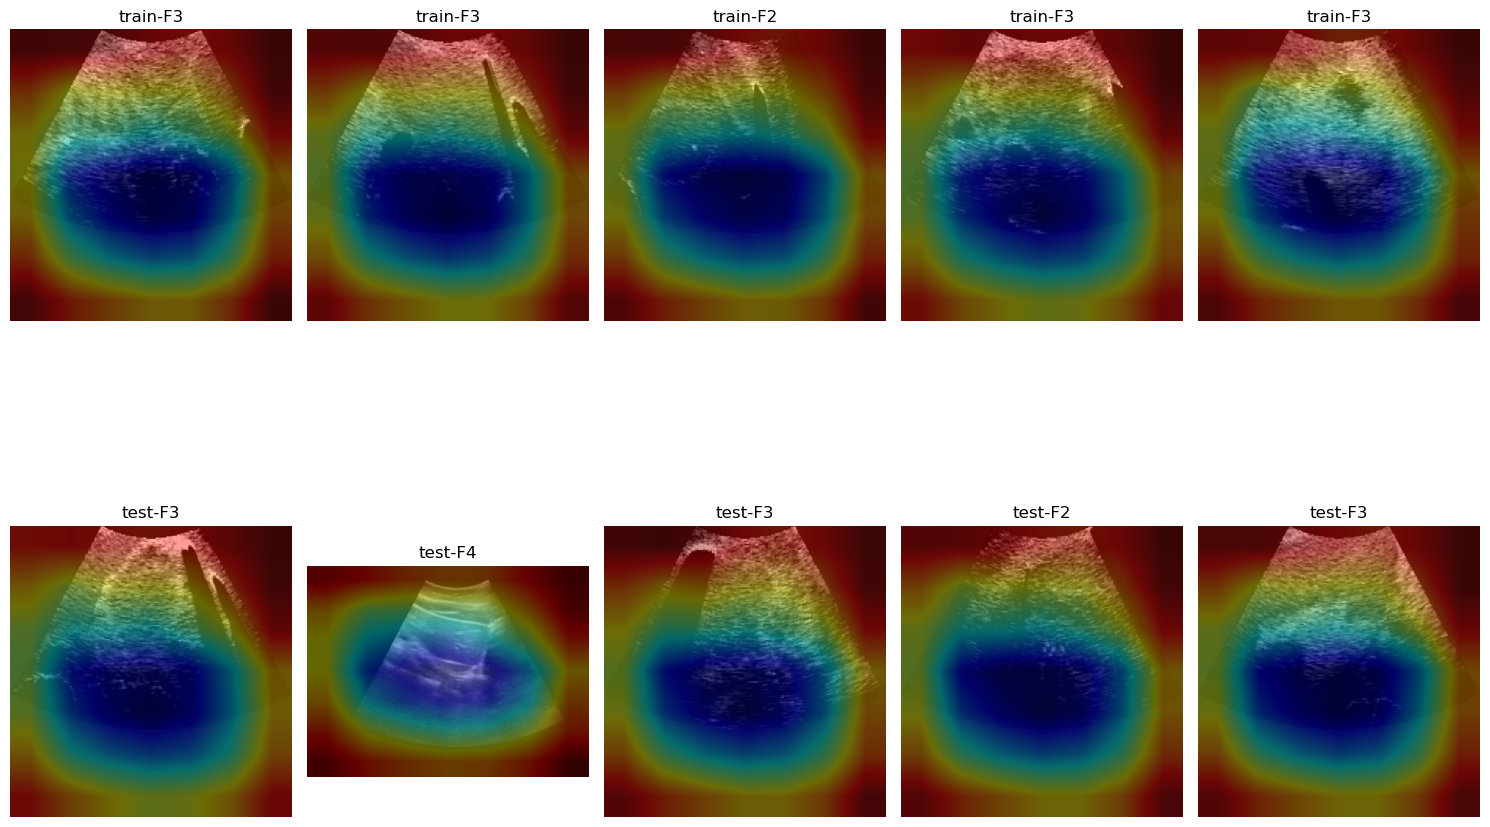

In [60]:
import os, random
import torch
import torch.nn.functional as F
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

# ----------------------------
# Grad-CAM class
# ----------------------------
class GradCAM:
    def __init__(self, model, target_layer, device):
        self.model = model
        self.model.eval()
        self.device = device
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_layers()

    def hook_layers(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()

        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0].detach()

        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_backward_hook(backward_hook)

    def generate(self, input_tensor, class_idx=None):
        input_tensor = input_tensor.to(self.device)

        # Forward
        output = self.model(input_tensor)
        if class_idx is None:
            class_idx = output.argmax(dim=1).item()

        # Backward
        self.model.zero_grad()
        class_loss = output[0, class_idx]
        class_loss.backward()

        # Grad-CAM
        weights = self.gradients.mean(dim=(2, 3), keepdim=True)
        gradcam = (weights * self.activations).sum(dim=1, keepdim=True)
        gradcam = F.relu(gradcam)

        gradcam = F.interpolate(gradcam, size=input_tensor.shape[2:], mode="bilinear", align_corners=False)
        heatmap = gradcam.squeeze().cpu().numpy()
        heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-8)
        return heatmap

# ----------------------------
# Overlay heatmap on image
# ----------------------------
def show_gradcam_on_image(img_path, heatmap, title=""):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    plt.imshow(superimposed_img)
    plt.title(title)
    plt.axis("off")

# ----------------------------
# Load your trained model
# ----------------------------

num_classes = 5   # F0–F4
model = ResNet50_CBAM(num_classes=num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load("best_model.pth", map_location=device))
model.to(device)
model.eval()

target_layer = model.layer4[-1]
gradcam = GradCAM(model, target_layer, device)

# ----------------------------
# Random sample from dataset
# ----------------------------
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

# Paths
train_dir = r"E:\resnet50+cbam\Balanced_Dataset\train"
test_dir  = r"E:\resnet50+cbam\Balanced_Dataset\test"

# Pick 5 random train and 5 random test images
all_samples = []
for dset in [train_dir, test_dir]:
    classes = os.listdir(dset)
    for _ in range(5):
        cls = random.choice(classes)
        img_file = random.choice(os.listdir(os.path.join(dset, cls)))
        all_samples.append((os.path.join(dset, cls, img_file), cls, dset))

# ----------------------------
# Run Grad-CAM and show results
# ----------------------------
plt.figure(figsize=(15, 12))

for idx, (img_path, cls, dset) in enumerate(all_samples, 1):
    img = Image.open(img_path).convert("RGB")
    input_tensor = transform(img).unsqueeze(0)

    heatmap = gradcam.generate(input_tensor)

    plt.subplot(2, 5, idx)
    show_gradcam_on_image(img_path, heatmap, title=f"{os.path.basename(dset)}-{cls}")

plt.tight_layout()
plt.show()


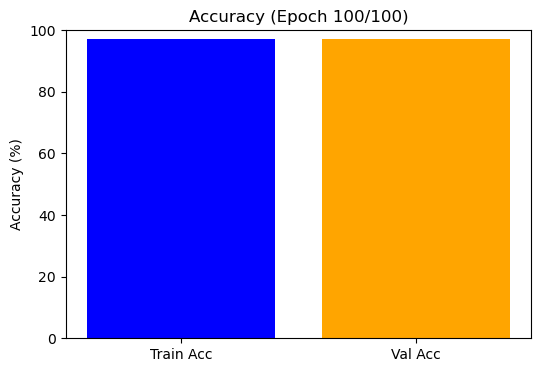

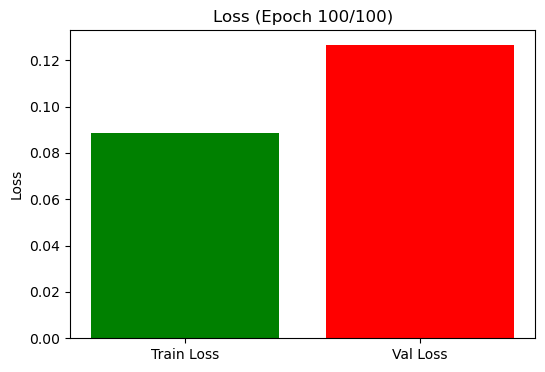

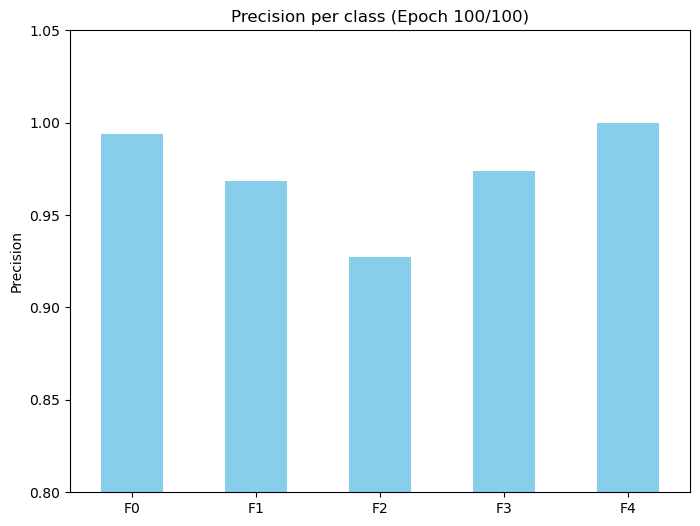

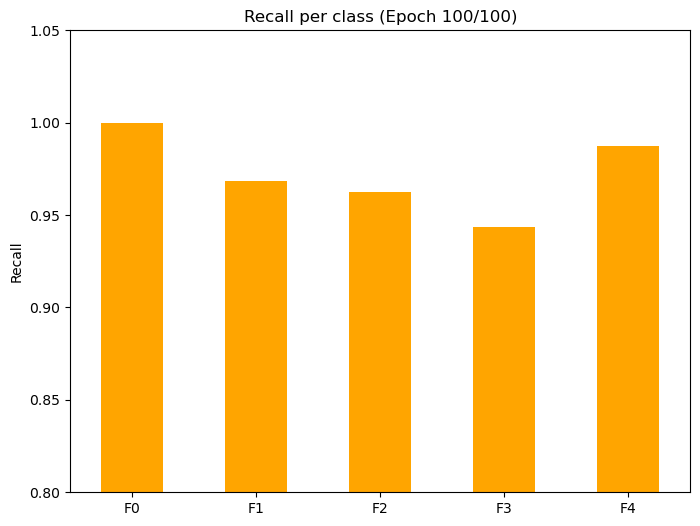

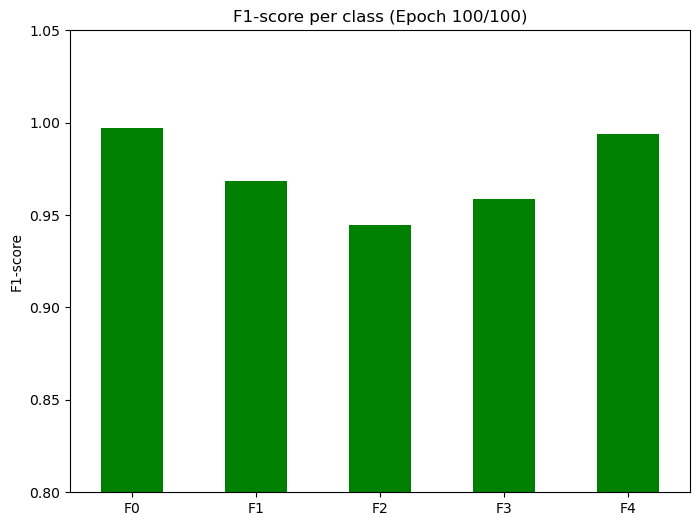

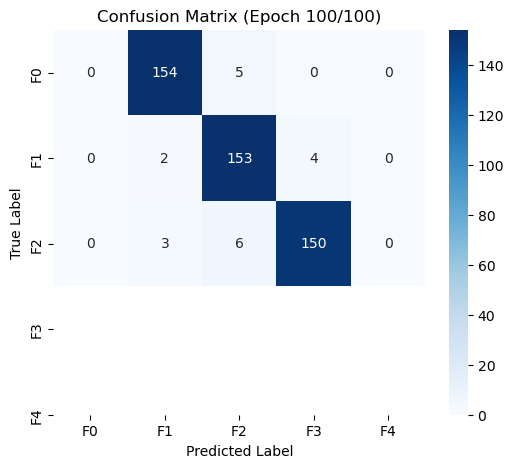

In [67]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ------------------------
# Step 1: Read log file
# ------------------------
with open("training.log", "r", encoding="utf-8") as f:   # change filename if needed
    log_text = f.read()

# ------------------------
# Step 2: Extract last epoch block (Epoch 100/100)
# ------------------------
match = re.search(r"Epoch 100/100:.*?(?=Epoch|\Z)", log_text, re.S)
if not match:
    raise ValueError("Epoch 100/100 not found in log.")
last_epoch_block = match.group(0)

# ------------------------
# Step 3: Parse metrics
# ------------------------
# Accuracy
acc_match = re.search(
    r"Training Accuracy:\s*([\d.]+)%\s+Validation Accuracy:\s*([\d.]+)%",
    last_epoch_block
)
train_acc = float(acc_match.group(1))
val_acc   = float(acc_match.group(2))

# Loss
loss_match = re.search(
    r"Training Loss:\s*([\d.]+)\s+Validation Loss:\s*([\d.]+)",
    last_epoch_block
)
train_loss = float(loss_match.group(1))
val_loss   = float(loss_match.group(2))

# Classification Report
report_block = re.search(r"Classification Report:(.*?)Confusion Matrix:", last_epoch_block, re.S).group(1)
report_lines = [line.strip() for line in report_block.splitlines() if line.strip()]

classes, prec, rec, f1 = [], [], [], []
for line in report_lines:
    parts = line.split()
    if parts[0] in ["precision", "accuracy", "macro", "weighted"]:
        continue
    if len(parts) >= 4:
        classes.append(parts[0])
        prec.append(float(parts[1]))
        rec.append(float(parts[2]))
        f1.append(float(parts[3]))

df_report = pd.DataFrame({
    "Precision": prec,
    "Recall": rec,
    "F1-score": f1
}, index=classes)

# Confusion Matrix
cm_block = re.search(r"Confusion Matrix:\s*\[\[(.*?)\]\]", last_epoch_block, re.S).group(1)
cm_rows = re.findall(r"\[(.*?)\]", cm_block)
confusion_matrix = [list(map(int, row.split())) for row in cm_rows]

# ------------------------
# Step 4: Plots
# ------------------------

# Accuracy
plt.figure(figsize=(6,4))
plt.bar(["Train Acc", "Val Acc"], [train_acc, val_acc], color=["blue", "orange"])
plt.ylabel("Accuracy (%)")
plt.title("Accuracy (Epoch 100/100)")
plt.ylim(0, 100)
plt.show()

# Loss
plt.figure(figsize=(6,4))
plt.bar(["Train Loss", "Val Loss"], [train_loss, val_loss], color=["green", "red"])
plt.ylabel("Loss")
plt.title("Loss (Epoch 100/100)")
plt.show()

# Precision per class
df_report["Precision"].plot(kind="bar", figsize=(8,6), color="skyblue")
plt.title("Precision per class (Epoch 100/100)")
plt.ylim(0.8, 1.05)
plt.xticks(rotation=0)
plt.ylabel("Precision")
plt.show()

# Recall per class
df_report["Recall"].plot(kind="bar", figsize=(8,6), color="orange")
plt.title("Recall per class (Epoch 100/100)")
plt.ylim(0.8, 1.05)
plt.xticks(rotation=0)
plt.ylabel("Recall")
plt.show()

# F1-score per class
df_report["F1-score"].plot(kind="bar", figsize=(8,6), color="green")
plt.title("F1-score per class (Epoch 100/100)")
plt.ylim(0.8, 1.05)
plt.xticks(rotation=0)
plt.ylabel("F1-score")
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix (Epoch 100/100)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()
